In [10]:
%cd /storage/lab/solar-energy-prediction/

/storage/lab/solar-energy-prediction


In [11]:
import pandas as pd
paris = pd.read_csv("data/weather/paris_hourly.csv")
paris.columns

Index(['datetime', 'timestamp', 'station', 'station_name', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'surface_pressure',
       'wind_speed_10m', 'wind_direction_10m', 'shortwave_radiation'],
      dtype='object')

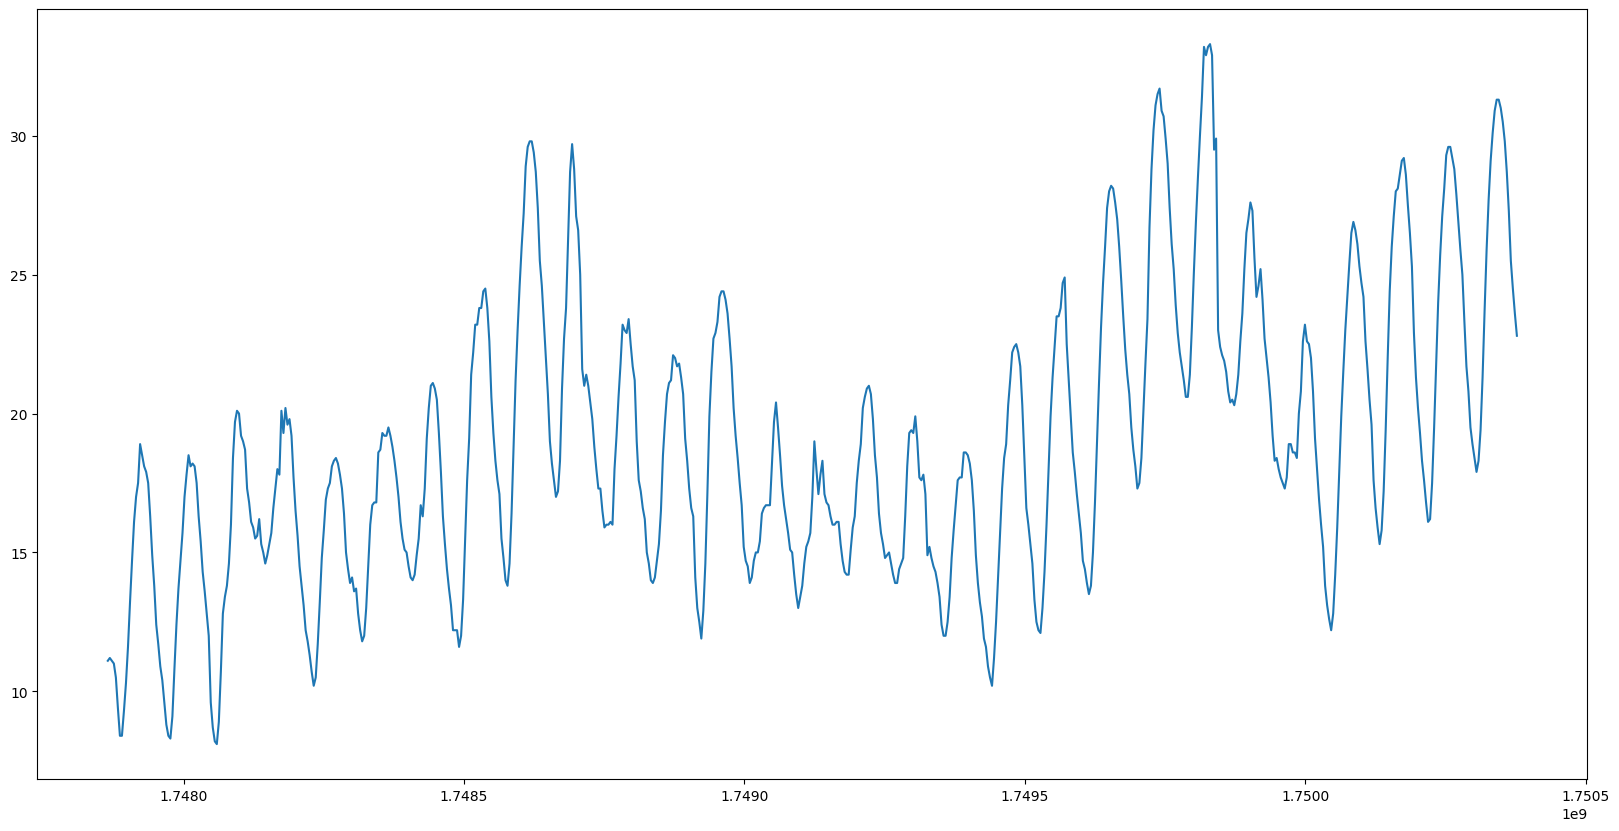

In [12]:
import matplotlib.pyplot as plt
from src.collect_data.timeutils import date_to_int
t = map(lambda x: date_to_int(x),paris['datetime'])
t = list(t)
plt.figure(figsize=(20,10))
plt.plot(t, paris["temperature_2m"])

In [13]:
time = paris['datetime']
time.head()

0    2025-05-22 00:00:00
1    2025-05-22 01:00:00
2    2025-05-22 02:00:00
3    2025-05-22 03:00:00
4    2025-05-22 04:00:00
Name: datetime, dtype: object

In [14]:
from datetime import datetime
import zoneinfo
import pandas as pd
import os
import numpy as np

from src.collect_data.timeutils import int_to_date

data = pd.read_csv("data/energy/SOLAR.csv")

time_energy = data['start'].apply(lambda x: datetime.fromtimestamp(
    x, tz=zoneinfo.ZoneInfo('Europe/Paris')))
time_energy.head()

0   2025-03-13 00:00:00+01:00
1   2025-03-13 01:00:00+01:00
2   2025-03-13 02:00:00+01:00
3   2025-03-13 03:00:00+01:00
4   2025-03-13 04:00:00+01:00
Name: start, dtype: datetime64[ns, Europe/Paris]